In [1]:
!pip install -U scikit-learn

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [3]:
df = pd.read_csv('ecommerce_return_data.csv')

In [4]:
df.head()

,Order_ID,Product_ID,User_ID,Order_Date,Return_Date,Product_Category,Product_Price,Order_Quantity,Return_Reason,Return_Status,Days_to_Return,User_Age,User_Gender,User_Location,Payment_Method,Shipping_Method,Discount_Applied
0,ORD00000000,PROD00000000,USER00000000,05-08-2023,26-08-2024,Clothing,411.59,3,Changed mind,Returned,387,58,Male,City54,Debit Card,Next-Day,45.27
1,ORD00000001,PROD00000001,USER00000001,09-10-2023,09-11-2023,Books,288.88,3,Wrong item,Returned,31,68,Female,City85,Credit Card,Express,47.79
2,ORD00000002,PROD00000002,USER00000002,06-05-2023,NaN,Toys,390.03,5,No Return,Not Returned,0,22,Female,City30,Debit Card,Next-Day,26.64
3,ORD00000003,PROD00000003,USER00000003,29-08-2024,NaN,Toys,401.09,3,No Return,Not Returned,0,40,Male,City95,PayPal,Next-Day,15.37
4,ORD00000004,PROD00000004,USER00000004,16-01-2023,NaN,Books,110.09,4,No Return,Not Returned,0,34,Female,City80,Gift Card,Standard,16.37


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          10000 non-null  object 
 1   Product_ID        10000 non-null  object 
 2   User_ID           10000 non-null  object 
 3   Order_Date        10000 non-null  object 
 4   Return_Date       5052 non-null   object 
 5   Product_Category  10000 non-null  object 
 6   Product_Price     10000 non-null  float64
 7   Order_Quantity    10000 non-null  int64  
 8   Return_Reason     10000 non-null  object 
 9   Return_Status     10000 non-null  object 
 10  Days_to_Return    10000 non-null  int64  
 11  User_Age          10000 non-null  int64  
 12  User_Gender       10000 non-null  object 
 13  User_Location     10000 non-null  object 
 14  Payment_Method    10000 non-null  object 
 15  Shipping_Method   10000 non-null  object 
 16  Discount_Applied  10000 non-null  float64

In [6]:
df.isnull().sum()

Order_ID               0
Product_ID             0
User_ID                0
Order_Date             0
Return_Date         4948
Product_Category       0
Product_Price          0
Order_Quantity         0
Return_Reason          0
Return_Status          0
Days_to_Return         0
User_Age               0
User_Gender            0
User_Location          0
Payment_Method         0
Shipping_Method        0
Discount_Applied       0
dtype: int64

In [7]:
df.describe()

,Product_Price,Order_Quantity,Days_to_Return,User_Age,Discount_Applied
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,252.369307,3.006100,122.897000,44.195000,24.992162
std,142.883865,1.406791,172.482508,15.311983,14.363396
min,5.010000,1.000000,0.000000,18.000000,0.000000
25%,128.650000,2.000000,0.000000,31.000000,12.752500
50%,250.445000,3.000000,5.000000,44.000000,24.840000
75%,377.837500,4.000000,218.000000,57.000000,37.605000
max,499.890000,5.000000,726.000000,70.000000,50.000000


In [8]:
df['Return_Binary'] = df['Return_Status'].map({'Returned':1, 'Not Returned':0})

In [9]:
category_return = df.groupby('Product_Category')['Return_Binary'].mean() * 100
print("\nReturn % per Product Category:\n", category_return)


Return % per Product Category:
 Product_Category
Books          50.661440
Clothing       52.450000
Electronics    50.931990
Home           49.014778
Toys           49.537037
Name: Return_Binary, dtype: float64


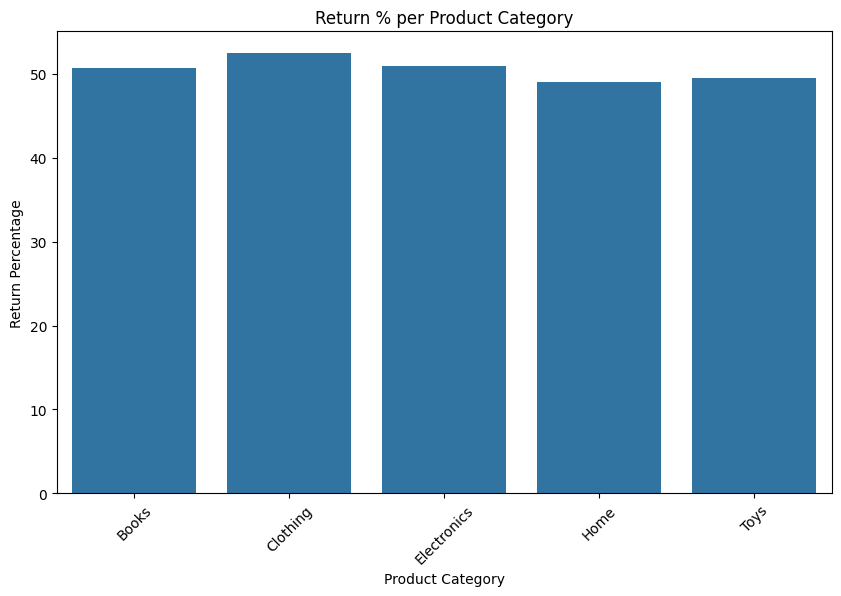

In [10]:
plt.figure(figsize=(10,6))
sns.barplot(x=category_return.index, y=category_return.values)
plt.title('Return % per Product Category')
plt.ylabel('Return Percentage')
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.show()

In [11]:
# Dropping irrelevant columns for modeling
cols_to_drop = ['Order_ID', 'Product_ID', 'User_ID', 'Order_Date', 'Return_Date', 'Return_Reason', 'Return_Status']
df_model = df.drop(columns=cols_to_drop)

In [12]:
# Handling missing values
df_model = df_model.fillna(0)

In [13]:
# Encoding categorical variables
categorical_cols = df_model.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df_model[col] = le.fit_transform(df_model[col])

In [14]:
# Features and Target
X = df_model.drop('Return_Binary', axis=1)
y = df_model['Return_Binary']

In [15]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [18]:
# Predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:,1]

In [19]:
# Evaluation
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1009
           1       1.00      0.95      0.97       991

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



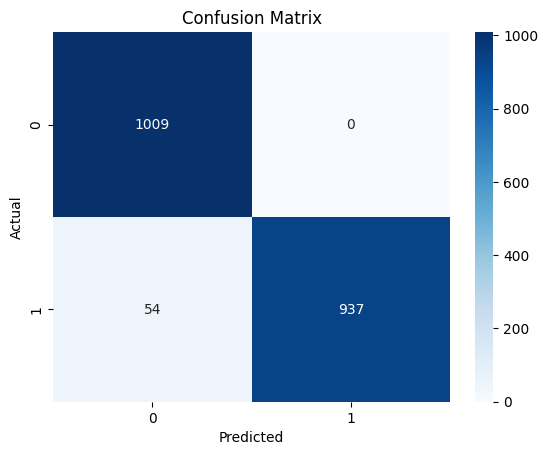

In [20]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [21]:
# ROC-AUC Score
roc_score = roc_auc_score(y_test, y_pred_prob)
print("\nROC-AUC Score:", roc_score)


ROC-AUC Score: 0.9999889991089278


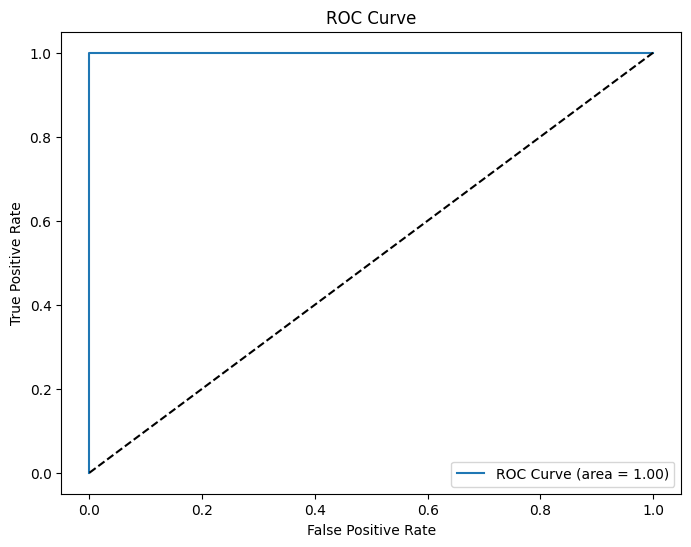

In [22]:
# Plotting ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_score:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()